In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")

In [2]:
import McExperiment
from McExperiment import *
import importlib
importlib.reload(McExperiment)

<module 'McExperiment' from 'd:\\OneDriveLenovoD\\OneDrive\\A_Fall23\\FIN535\\HW2023\\FIN535-Final-23F\\Dec20\\FIN535-Final-23F\\McExperiment.py'>

In [3]:
data = pd.read_csv('data.csv')
data['month'] = data['month'].apply(lambda x: datetime.strptime(x, '%Y-%m')) #assume each date per month is the last day
data.set_index(['month'],inplace=True)

In [20]:
# 5Y max Sharpe Strategy -------------------------------------------------------------------------------
# All value ar risk quoted in a return way (not in a loss way)
ratio1 = [0.6, 0.45, 0.3, 0.7, -0.05]
print(ratio1)
SAVE = 40000
CAP = 50000
g = 0.11
MC = 500
path_length = 120 # 10 year
tax_rate = 0.25
# Get the analysis for end of 5Y/7Y/10Y 
Simu_table, Simu_cap_table = Experiments(MC,120,data,CAP,SAVE,g,ratio1,years=[60,84,120],tax=tax_rate)
Summary_table,cap_table = GetSummary(Simu_table, Simu_cap_table, path_length)
Summary_table = Summary_table.fillna(0)
Summary_table.round(2)

[0.6, 0.45, 0.3, 0.7, -0.05]


,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
5Y,251607.23,62665.82,251607.23,0.0,1.60,2.13,0.17,0.34,0.34,-366691.23,-366691.23
7Y,417112.43,86224.16,385734.28,0.2,1.55,2.07,0.19,1.03,1.00,-222975.51,-263987.64
10Y,885801.41,164452.52,0.00,1.0,1.67,2.29,0.20,1.95,1.95,61281.70,54354.17


In [18]:
mcdf = Path_Generator(path_length, data)
rst = MC_generate_car(mcdf, CAP, SAVE, g, ratio1)

In [19]:
rst.iloc[82:86,:]

,addCap,ret,cap_total,cap_input
month,,,,
2015-11-01,0.000000,0.015264,295893.890761,316514.382604
2015-12-01,0.000000,0.033156,305704.574136,316514.382604
2016-01-01,74816.582086,0.062318,404234.409248,391330.964690
2016-02-01,0.000000,0.061012,428897.660011,391330.964690


In [12]:
# Get the historical Capital plot - data from the last 10 years
subdf = data.iloc[48:120,:] # Data from the first 10 years
alloc_ratio = pd.DataFrame(np.array([[0.6, 0.45, 0.3, 0.7, -0.05], [0.65,0.9,0.45,0.7,-0.55]]),\
    columns = ['x1','x2','x3','x4','x5'], index = ['alloc_1','alloc_2'])

SAVE = 40000
CAP = 50000
g = 0.11
MC = 500
path_length = 120 # 10 year
tax_rate = 0.25

paths = []
for i in range(2):
    ratio = (alloc_ratio.iloc[i,:]).to_list()
    paths.append(MC_generate(subdf, CAP, SAVE, g, ratio))

In [13]:
paths_car = []
for i in range(2):
    ratio = (alloc_ratio.iloc[i,:]).to_list()
    paths_car.append(MC_generate_car(subdf, CAP, SAVE, g, ratio))

In [14]:
df1 = pd.concat(paths,axis=1).iloc[:,np.r_[2,6]]
df1.columns = ['alloc_1','alloc_2']
df2 = pd.concat(paths_car,axis=1).iloc[:,np.r_[2,6]]
df2.columns = ['alloc_1','alloc_2']

In [15]:
rst = pd.concat([df1,df2],axis=1)
rst.columns = ['alloc_1','alloc_2','alloc_1 + car','alloc_2 + car']

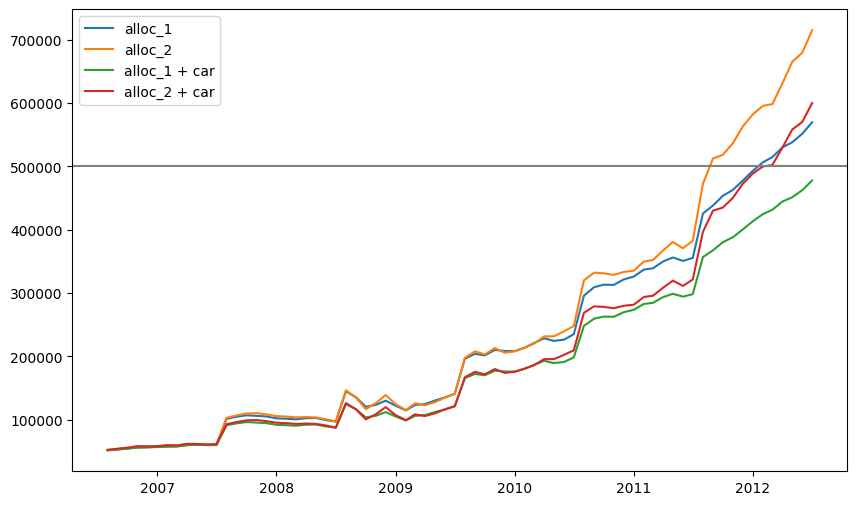

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(rst)
plt.axhline(y=500000, color='grey', linestyle='-')
plt.legend(['alloc_1','alloc_2','alloc_1 + car','alloc_2 + car'])
plt.savefig('figures/alloc_all_first10year_capitalplot_pretax.png',bbox_inches='tight')
plt.show()

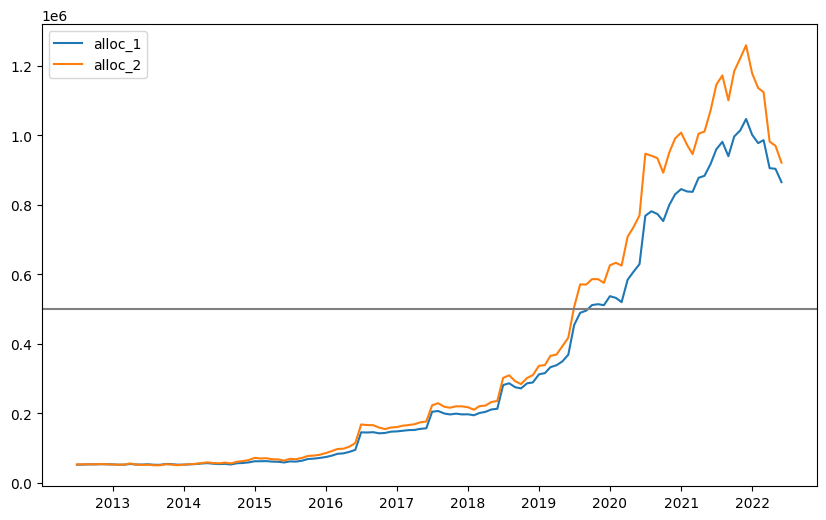

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(df2)
plt.axhline(y=500000, color='grey', linestyle='-')
plt.legend(['alloc_1','alloc_2'])
plt.savefig('figures/alloc_car_realtime_capitalplot_all.png',bbox_inches='tight')
plt.show()